# Welcome to - What distribution its belong?
* Today we will see a nice case of the Poisson distribution!
* Remember as a child when you collected cards? Remember the promise of "one rare card in the box"?

##### let's start by importing the important libraries:

In [35]:
import pandas as pd
from scipy.stats import poisson,chi2
from PIL import Image

### Let's look at an example image that will illustrate the case

* As you can see, in the image we are promised one "rare" card on average in each box : 
$$ \lambda = 1 $$

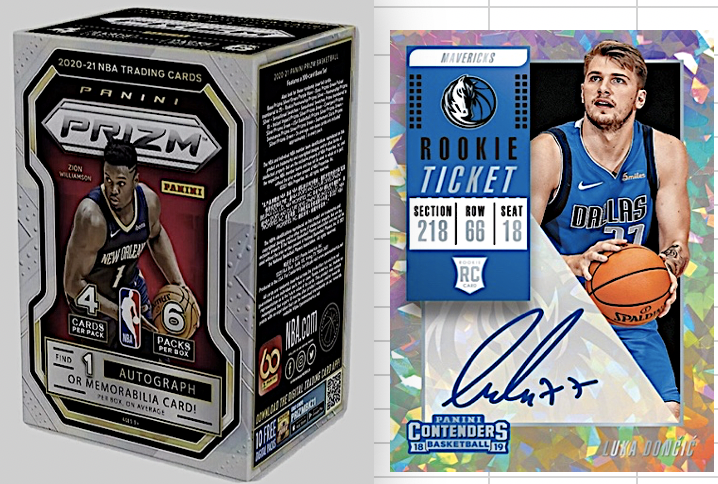

In [36]:
Image.open("pngis/NBA PANINI.png")

### Let's start the experiment!

* We obtained a small sample size of 47 trials --> $$ n = 47 $$
* Now we have the dataset that we needed so let's start!

In [37]:
df = pd.read_csv("DataSets/Panini Cards.csv")
df

,sign card,frq
0,0,16
1,1,16
2,2,13
3,3,2
4,4,0
5,5,0


### OH! Nice its look like the poisson distribution..
#### This is the time for Chi-square goodness of fit test!
* Our H0 = the dataset is poisson distributed
* Our H1 = the dataset is not poisson distributed

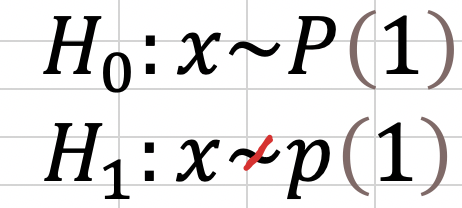

In [38]:
Image.open("pngis/hypothesis.png")

#### We made great progress! Next we will add another column of classical Poisson distribution

In [39]:
po_array = []
for i in range(df.shape[0]):
    temp = poisson.pmf(i, 1)
    po_array.append(temp)

df["poisson"] = po_array
df

,sign card,frq,poisson
0,0,16,0.367879
1,1,16,0.367879
2,2,13,0.183940
3,3,2,0.061313
4,4,0,0.015328
5,5,0,0.003066


#### Now the question arises, what would we expect to get with the same sample size?

In [40]:
sumi = df["frq"].sum()

exp_array = []
for i in range(df.shape[0]):
    temp = df["poisson"][i]
    exp_array.append(sumi * temp)

df["expected"] = exp_array

df

,sign card,frq,poisson,expected
0,0,16,0.367879,17.290334
1,1,16,0.367879,17.290334
2,2,13,0.183940,8.645167
3,3,2,0.061313,2.881722
4,4,0,0.015328,0.720431
5,5,0,0.003066,0.144086


#### We have reached the interesting stage!, 
* let's use the formula to find a statistic: $$\sum_{n=0}^{6}  \frac{(O_{i} - E{i})^2}{E{i}} $$



In [41]:
df["statistic"] = ((df["expected"] - df["frq"])**2) / (df["expected"])
df

,sign card,frq,poisson,expected,statistic
0,0,16,0.367879,17.290334,0.096294
1,1,16,0.367879,17.290334,0.096294
2,2,13,0.183940,8.645167,2.193662
3,3,2,0.061313,2.881722,0.269781
4,4,0,0.015328,0.720431,0.720431
5,5,0,0.003066,0.144086,0.144086


### A bit long process isn't it?

* Let's build an automation function so that we don't have to repeat the process every time
* the function paramates are : name of the csv file , our lambda , the statistical alpha and the degree of freedom

In [42]:
def is_poisson_dist(csv_name,lamda,a,DF):
   import pandas as pd
   from scipy.stats import poisson,chi2

   df = pd.read_csv(str(csv_name)+".csv")

   po_array = []
   for i in range(df.shape[0]):
       temp = poisson.pmf(i,lamda)
       po_array.append(temp)
   df["poisson"] = po_array

   sumi = df["frq"].sum()

   exp_array = []
   for i in range(df.shape[0]):
       temp = df["poisson"][i]
       exp_array.append(sumi * temp)
   df["expected"] = exp_array

   df["statistic"] = ((df["expected"] - df["frq"])**2) / (df["expected"])
   statistic = df["statistic"].sum()
   critical = chi2.ppf((1-a),DF)


   if critical > statistic:
       return("Your data is poisson distributed: with confidence level of: " + str((1-a)*100) + "%")
   else:
       return("Your data is NOT poisson distributed: with confidence level of: " + str((1-a)*100) + "%")

is_poisson_dist("DataSets/Panini Cards",1,0.05,4)


   
   
    

'Your data is poisson distributed: with confidence level of: 95.0%'

# Thanks for watching!! 

#### you can use the prepared function for any size of dataset!